# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
     
---
* [OPENCV를 활용한 영상 처리2](#OPENCV를-활용한-영상-처리2)
  * [ OpenCV 머신러닝 ](#OpenCV-머신러닝)
      * [ Logistic Regression](#Logistic-Regression)
          * [create](#create)
          * [하이퍼파라미터 설정](#하이퍼파라미터-설정)
          * [train](#train)
          * [predict](#predict)
          * [데이터 생성:make_classification](#make_classification)
      * [KNearest](#KNearest)
      * [Unsupervised Learning ](#Unsupervised-Learning )
          * [PCA](#PCA)
          * [Kmeans](#Kmeans)

---
## OPENCV를 활용한 영상 처리2
- 머신러닝에 dependet 한 openCV 사용 예정
- OpenCV, Scikit-laern 데이터만 호환만 가능하면 됨.

- pandas의 DataFrame으로 변환하는 이유
    - 정형데이터에서 사용하는 많은 기능을 지원
    - 데이터 조작 용이
    - EDA (탐색적 데이터 분석) 그리기 편함
    - pandas는 Scikit-learn ,Keras, TensorFlow2.0 와 서로 연동

In [1]:
from sklearn.datasets import load_iris

In [2]:
import pandas as pd

In [3]:
data= load_iris()

In [4]:
iris=pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
iris['target']= data.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


EDA(탐색적 데이터 분석) 예시
- pair plot 데이터의 변수별로 분포, 데이터의 산점도를 각 변수의 쌍 별로 보여줌

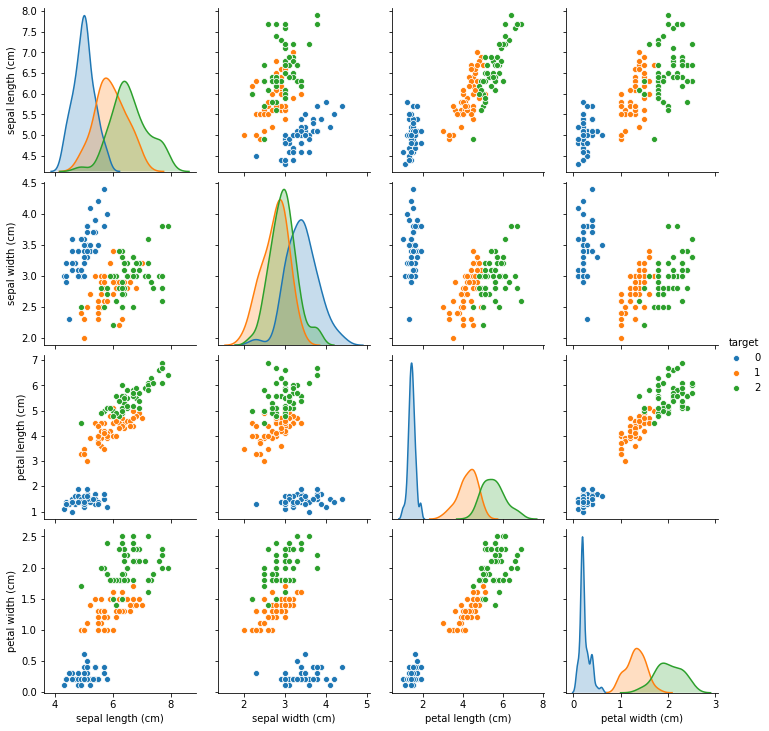

In [6]:
import seaborn as sns  
sns.pairplot(iris, hue='target') #연동이 됨 

이진 분류문제로 변경: 0,1 인값은 0, 2인 값은 1로 분류

In [44]:
iris.target = iris.target.map({0:0,1:0,2:1}) #binary 로 변경함
iris.target.value_counts()

0    100
1     50
Name: target, dtype: int64

In [38]:
iris  #pandas DataFrame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
iris.iloc[:,:-1].values #pandas DataFrame -> Numpy array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### OpenCV 머신러닝 

- 이미지,영상 데이터에 최적화
    - <> sickit-learn은 범용적인 라이브러리이기 때문에 이미지 처리를 위해서 다른 library 이용해야함
- 요즘 나오는 다른 언어는 python이 제 1언어, openCV는 C++이 기본으로 시스템 porting 쉬움
- **영상 기반 ML, DL 에 더 초점**을 맞춤


model selection 
- 알고리즘 특징별 ML 분류
    - linear vs Nonlinear
    - parametric vs Non-parametric
        - non parametric :DL
    - probabilistic vs Non-probabilistic
 OpenCV 알고리즘별로 다르므로 `dir`꼭 해야함    
 
### Logistic Regression 
- Binary classification 알고리즘
    - 두개의 class로 분류함

- scikit은 interface가 동일
- 하이퍼파라미터 : 학습에서 얻는게아닌 모델 만드는 사람이 지정하는 것
    1. 인스턴스화
    2. set_params
        - gridsearchCV, randomizedsearchCV :각 하이퍼 파라미터 적용하여 성능 비교하여 최적의 하이퍼 파라미터 찾음
        
 openCV는 2번째 방식과 동일

In [10]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=2.0,max_iter=200)
lr.fit(iris.iloc[:,:-1], iris.target)

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### multiclassification
- scikit-learn에서는 logistic reg 알고리즘이 으로 자동으로 다중분류 문제로 바꿈  

분류하는 방식
- OneVsOneClassifier
    - 클래스를 1:1씩 비교 
        - class1 이거나 class 2
- OneVsRestClassifier
    - 1:N으로 비교하여 분류
        - class 1 이다 아니다
        
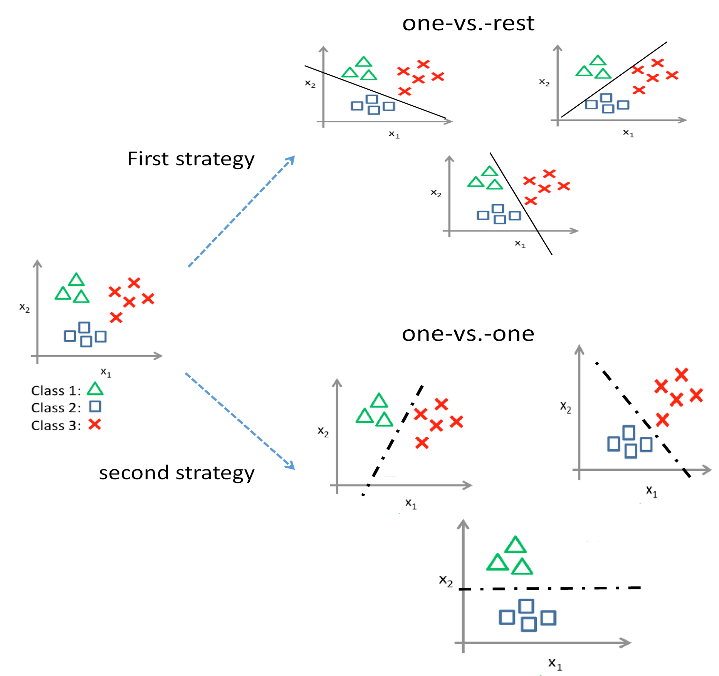

어떤 프레임워크는 이진분류 알고리즘이 multiclass 가능 여부 알아야함
- scikit 은 지원 

In [11]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [12]:
OneVsOneClassifier(LogisticRegression())

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   n_jobs=None)

In [13]:
lr.set_params(C=3)
lr.get_params()  #키워드 방식으로 hyperparameter 변경함

{'C': 3,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [18]:
import cv2

1. #### create
    - 객체지향 기법으로 class를 인스턴스화
    - 하이퍼 파라미터는 생성할때 넣거나 

In [19]:
lr=cv2.ml.LogisticRegression_create()

In [20]:
cv2.ml.LogisticRegression_BATCH , cv2.ml.LogisticRegression_MINI_BATCH #1

(0, 1)

2. #### 하이퍼파라미터 설정
    - `setTrainMethod`
        - LogisticRegression_BATCH
        - LogisticRegression_MINI_BATCH
    - `setMiniBatchSize`
    - `setIterations`

In [21]:
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)  #C를 따르므로 python 규정 안 따름

In [22]:
lr.setMiniBatchSize(1)

In [23]:
lr.setIterations(200)

In [24]:
import numpy as np

3. #### train
    - openCV는 각 알고리즘마다 방식이 다름
    - C의 함수명과 일치시킴

pandas 에서 Numpy로 변경 가능
- `.values` Pandas Data Frame -> Numpy array 가져옴


In [25]:
lr.train(iris.iloc[:,:-1].values.astype('float32') ,
         cv2.ml.ROW_SAMPLE, iris.target.values.astype('float32'))

True

4. #### predict
    - train 기반으로 예측

In [26]:
lr.predict(np.array([[5.9, 3.2, 4.8,1.8]],dtype='float32'))

(1.0, array([[1]], dtype=int32))

- 규칙에 따라서 직접 다 변경해야함
- 데이터 타입, 자료형태 등의 정확한 개념을 알아야 함


OpenCV
- computer vision

LogisticRegressionCV,GridSearchCV, RandomizedSearchCV
- cross validation( 교차 검정)

---
### 데이터 생성
- Numpy에서 랜덤하게 가짜 데이터 만들기
    - `np.random`
- scikit 에서 가짜 데이터 만들기
    - `make_`
#### sklearn.datasets
- `load_` 
    - 크기 작은 연습용 데이터 
- `fetch_` 
    - 크기가 큰 연습용 데이터 인터넷에서 다운로드
- `make_`
    - 랜덤하게 데이타 생성
    
나중에 영상처리에서 noise 를 생성해서 성능 높이는 방법이 있음

##### make_classification
- n개의 클래스 분류 문제/데이터를 랜덤하게 생성

In [27]:
from sklearn.datasets import make_classification

In [28]:
make_classification(n_samples=100,n_features=10) #분류 데이터 생성

(array([[-1.26244317e+00,  6.41044117e-01,  7.81383527e-01,
         -1.77925377e-01,  6.70239597e-01, -2.71021530e-01,
          3.10257852e-01, -9.41929726e-01,  6.77936103e-01,
         -4.34859634e-01],
        [-7.09670831e-01,  1.13930155e+00, -7.03526980e-01,
          1.40806212e-01,  1.77928230e+00, -1.12998151e+00,
          2.12095776e+00, -7.36139296e-01,  1.17684711e+00,
         -3.20973159e-02],
        [-8.66816323e-01,  8.09460763e-01,  2.23837450e+00,
         -7.98819049e-03,  8.77964330e-01,  2.04628250e-01,
          3.80458901e-01, -7.90207395e-01, -2.68323714e+00,
         -1.97902059e-01],
        [ 1.47687608e+00, -1.00327917e+00, -4.84855973e-01,
          1.29819008e-01, -7.22156416e-01,  5.54452115e-02,
         -1.30944338e+00, -7.72336848e-01, -2.14050600e+00,
          4.39654869e-01],
        [-2.08327109e-01, -4.77714235e-01,  9.78089932e-01,
         -2.09760656e-01, -7.73652082e-01,  3.98728729e-01,
          2.71818268e-01, -3.81013183e-01, -1.316532

In [29]:
data_point= np.random.randint(0,100,(20,2)) #0~100까지 숫자중 랜덤하게 (20,2) 모양의 행렬

In [30]:
data_point #2차원 데이터 20개

array([[49, 59],
       [86, 90],
       [ 2, 26],
       [29, 55],
       [90, 63],
       [29, 59],
       [83, 18],
       [88, 63],
       [49, 28],
       [ 8, 48],
       [69,  6],
       [51, 51],
       [67, 96],
       [55, 70],
       [54, 65],
       [24, 20],
       [22,  6],
       [33,  4],
       [72, 15],
       [59,  4]])

In [31]:
data_label = np.random.randint(0,2)
data_label

1

(data,target)
- data  (100,2)
    - 0~100 사이의 정수값으로 (샘플수, featrue 수)
- target  (100,) 
    - 0,1로 구분되는 2개의 class n_feature

In [32]:
def make_point(n_sample, n_feature):
    label=np.random.randint(0,2, size=(n_sample)) #binary
    return np.random.randint(0,100,size=(n_sample,n_feature)),label

In [33]:
data= make_point(100,2)  #scikit-learn 의 데이터와 유사함
data

(array([[72, 25],
        [20, 42],
        [26,  2],
        [83, 19],
        [52, 81],
        [31, 89],
        [91, 57],
        [ 3, 91],
        [87, 74],
        [52, 44],
        [31,  6],
        [50, 31],
        [ 4, 78],
        [55, 68],
        [ 0, 92],
        [ 0, 37],
        [17,  7],
        [96, 34],
        [70, 45],
        [75, 18],
        [95, 25],
        [49, 52],
        [33,  4],
        [27, 16],
        [82,  2],
        [81, 89],
        [ 9, 89],
        [35, 33],
        [59, 97],
        [ 3,  1],
        [71, 67],
        [97, 45],
        [85, 18],
        [88, 60],
        [36, 71],
        [27, 33],
        [79, 69],
        [43, 98],
        [25, 53],
        [94, 47],
        [26, 54],
        [21, 60],
        [40, 50],
        [70, 70],
        [42,  6],
        [78, 83],
        [17, 34],
        [77, 90],
        [67, 21],
        [78, 65],
        [86, 86],
        [38,  2],
        [37, 93],
        [96, 88],
        [ 5, 69],
        [6

In [34]:
data[0][0]  #(100,2) 데이터의 첫 행

array([72, 25])

python 에서는 `, ` 로 하면 기본적으로 tuple

In [86]:
1,2 #기본 tuple

(1, 2)

### scatter
- 산점도 
- scatter(x,y)

In [36]:
import matplotlib.pyplot as plt

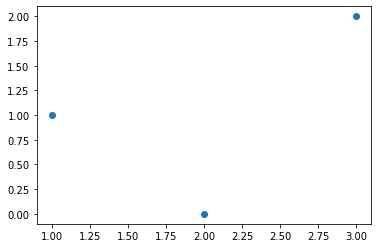

In [37]:
plt.scatter([1,2,3],[1,0,2])  #3개의 점 위치 : (1,1),(2,0),(3,2)

- x:(100,2)데이터에서 0번째 열
- y: (100,2)데이터에서 1번째 열

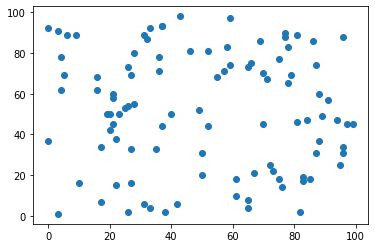

In [38]:
plt.scatter(data[0][:,0],data[0][:,1])

0,1 labe 별로 색상 구분


In [39]:
data[1].ravel() #ravel : view개념

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [40]:
data[1]==0 #0과 1로 구분된것을 boolean indexing 이용해서 추출

array([False,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
       False,  True, False,  True,  True, False, False,  True, False,
       False,  True, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True,  True,  True, False, False,
        True, False,  True, False,  True, False, False, False, False,
        True,  True, False,  True,  True, False,  True, False,  True,
        True])

class 0인 값은 blue, class 1인 값은 red

In [41]:
blue= data[0][data[1]==0]  
red = data[0][data[1]==1] 

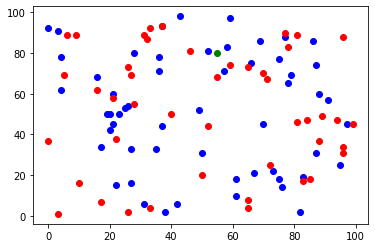

In [42]:
plt.scatter(blue[:,0],blue[:,1], color='b')
plt.scatter(red[:,0],red[:,1], color='r')
plt.scatter(55,80,color='g')      #초록색(55,80)은 class 1에 속할지 class 0에 속할지

---
### KNearest
K 최근접 이웃
- Innstance-based learning/ case by learning 
    - KNN 은 학습이 아닌 case에 따라 다름
    - train : 가장 가까운 k개의 점들 간의 상호관계를 학습
 

In [43]:
knn=cv2.ml.KNearest_create() #인스턴스화
knn.setAlgorithmType      #shift +tab : 설명 별로 없음

<function ml_KNearest.setAlgorithmType>

In [44]:
dir(cv2)

['',
 'ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'AsyncArray',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'BORDER_REFLECT',
 'BORDER_REFLECT101',


In [45]:
for i in dir(cv2.ml):
    if 'KN' in i:
        print(i)

KNEAREST_BRUTE_FORCE
KNEAREST_KDTREE
KNearest_BRUTE_FORCE
KNearest_KDTREE
KNearest_create
KNearest_load


In [46]:
knn.setAlgorithmType(10)
knn.getAlgorithmType() #무조건 1만 나옴- >알고리즘 타입 1개

1

어느 데이터에서 가장 가까운지 모름


In [47]:
cv2.ml.ROW_SAMPLE,cv2.ml.COL_SAMPLE #기본 row

(0, 1)

In [48]:
knn.train(data[0].astype('float32'), cv2.ml.ROW_SAMPLE, data[1]) 

True

In [49]:
np.array_equal(data[0].astype('float32'),data[0].astype(np.float32))

True

In [50]:
data[0].astype('float32')==data[0].astype(np.float32) #동일

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ Tr

 argument 형태
- str
- class

In [51]:
type('float32'), type( np.float32) #class 

(str, type)

In [52]:
# (55,88)일때 0 으로 예측 (파랑색)
knn.predict(np.mat([55,80]).astype('float32')) #floating point matrix

(0.0, array([[0.]], dtype=float32))

K개를 바꾸면 예측도 바뀔수도 있음

In [53]:
knn.findNearest(np.mat([55,80]).astype('float32'),2)

(0.0,
 array([[0.]], dtype=float32),
 array([[0., 0.]], dtype=float32),
 array([[10., 18.]], dtype=float32))

In [54]:
knn.findNearest(np.mat([55,80]).astype('float32'),3) #과반수로 0으로 예측

(0.0,
 array([[0.]], dtype=float32),
 array([[0., 0., 1.]], dtype=float32),
 array([[10., 18., 52.]], dtype=float32))

#### vars 
- scikit-learn 에서는 학습후에 값들이 더 많아짐 
- 객체/인스턴스가 현재 갖고 있는 값

In [55]:
vars(knn) #없음 .. ㅠㅠ

TypeError: vars() argument must have __dict__ attribute

### vars technique 
- scikit-learn 과 비교

In [56]:
from sklearn.neighbors import KNeighborsClassifier
sk_knn= KNeighborsClassifier()

In [57]:
vars(sk_knn)

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform'}

In [58]:
sk_knn.fit(data[0],data[1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
vars(sk_knn) #학습 후에 달라짐

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform',
 'outputs_2d_': False,
 'classes_': array([0, 1]),
 '_y': array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]),
 'effective_metric_params_': {},
 'effective_metric_': 'euclidean',
 '_fit_method': 'kd_tree',
 '_fit_X': array([[72, 25],
        [20, 42],
        [26,  2],
        [83, 19],
        [52, 81],
        [31, 89],
        [91, 57],
        [ 3, 91],
        [87, 74],
        [52, 44],
        [31,  6],
        [50, 31],
        [ 4, 78],
        [55, 68],
        [ 0, 92],
        [ 0, 37],
        [17,  7],
        [96, 34],

In [66]:
class B:
    b=1
    
a=B()
vars(a) #없음

{}

In [67]:
a.y=3
vars(a) # 인스턴스 attribute 생성하니 생김 

{'y': 3}

---
## Unsupervised Learning 

비지도 학습
- clustering
    - kmeans
- PCA
    - 대표적인 축 principal component 찾음

In [68]:
cv2.__version__ #version 4

'4.4.0'

In [69]:
import mglearn

### PCA
- 정답없이 자체 데이터를 갖고 데이터 전체의 경향을 잘 나타내는 principal components(주요 성분들) 를 찾음
- component 를 중심으로 축으로 회전시킴
- 차원을 줄여도 특성 그대로 갖고 있음
- linear decision boundary 로 구분 가능 
- 기계학습에서는 PCA 를 마지막에 쓰거나 최후의 수단으로 사용
    - feature selection 은 변수만 삭제하나 PCA는 전체 데이터의 값을 바꾸기 때문에 마지막에 사용

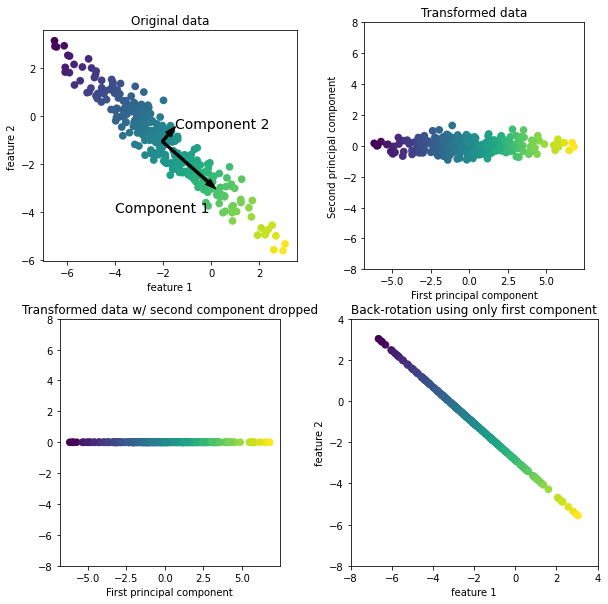

In [70]:
mglearn.plot_pca.plot_pca_illustration()

#### multivariate_normal
- 다변수정규분포 랜덤 생성
    - mean 평균
    - cov 공분산

In [71]:
data1=np.random.multivariate_normal((20,20),((12,8),(8,18)),1000)

In [72]:
data1.shape

(1000, 2)

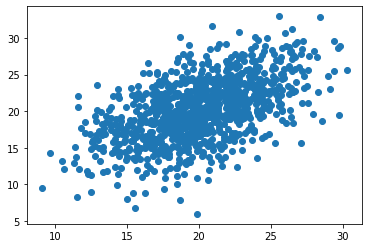

In [73]:
plt.scatter(data1[:,0],data1[:,1])

-  특성을 살려서 축소하는 방법은 분산이 가장 넓은 부분을 주성분으로함 
- 새로운 x 축을 기준으로 회전하여 차원을 축소

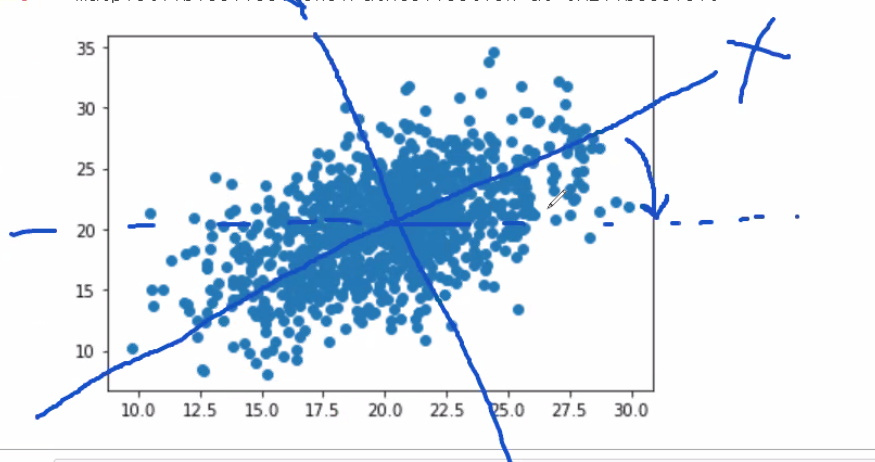

### PCACompute
- `PCACompute(data, mean[, eigenvectors[, maxComponents]]) -> mean, eigenvectors` 


In [74]:
cv2.PCACompute(data1, mean=np.mat([20,20],dtype='float32')) #ml에 단들어가져 있음 

(array([[20., 20.]]),
 array([[-0.59880828, -0.80089241],
        [-0.80089241,  0.59880828]]))

현 데이터의 평균이용 
- `np.mat([])`
> ### -1 technique
    - reshape : 데이터 크기 모를때 한 축의 전체를 나타낼때 -1
    - scikit-learn: njobs=-1 전체 cpu 사용

In [75]:
m,eigen= cv2.PCACompute(data1, np.mat([])) # default
m,eigen

(array([[20.02756261, 20.16772399]]),
 array([[-0.59935882, -0.80048049],
        [-0.80048049,  0.59935882]]))

mean, eigenvectors 가 나옴

(20,20) 중점으로 주축 찾아서 주성분 화살표 그림

#### quiver
Call signature:
  `quiver([X, Y], U, V, [C], **kw)`

- [X, Y] arrow 좌표축 위치
    - 기본 (0,0) (옵션이기 때문에)
- U Arrow size
- V Arrow shape

In [76]:
eigen[:,1]

array([-0.80048049,  0.59935882])

In [77]:
eigen[:,0]

array([-0.59935882, -0.80048049])

In [78]:
eigen

array([[-0.59935882, -0.80048049],
       [-0.80048049,  0.59935882]])

In [83]:
eigen[0,:]

array([-0.59935882, -0.80048049])

Principla Component 그리기
- 각 주성분은 평균을 기점으로 그림 

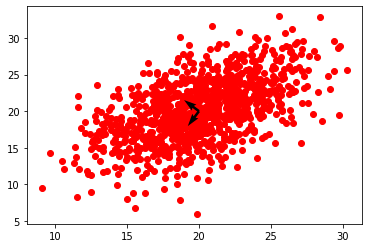

In [89]:
plt.scatter(data1[:,0],data1[:,1],color='r')
plt.quiver([20,20],[20,20],eigen[:,0],eigen[:,1])


- 빨강색이 원데이터
- 파랑색이 PCA로 변환한 데이터

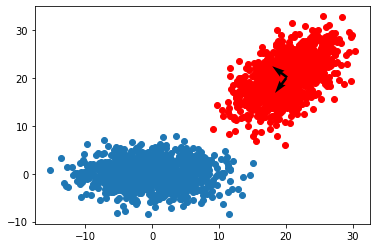

In [91]:
plt.scatter (data1[:,0],data1[:,1],color='r') #org
plt.quiver([m],[m],eigen[:,0],eigen[:,1])
plt.scatter (cv2.PCAProject(data1, m,eigen)[:,0],cv2.PCAProject(data1, m,eigen)[:,1])


In [93]:
m

array([[20.02756261, 20.16772399]])

In [87]:
cv2.PCAProject(data1, m,eigen) # PCA 통해서 바뀐 데이터 

array([[ 5.27372295,  0.99522143],
       [ 7.97147998, -0.23995229],
       [ 2.15494817,  2.18473114],
       ...,
       [ 7.07905152,  1.70370407],
       [ 8.11238532,  2.3067932 ],
       [-4.08658166,  1.22179089]])

### clustering
- kmeans - 거리 기반
- dbscan - 밀도 기반
    - t-SNE 에서 다룰 예정 
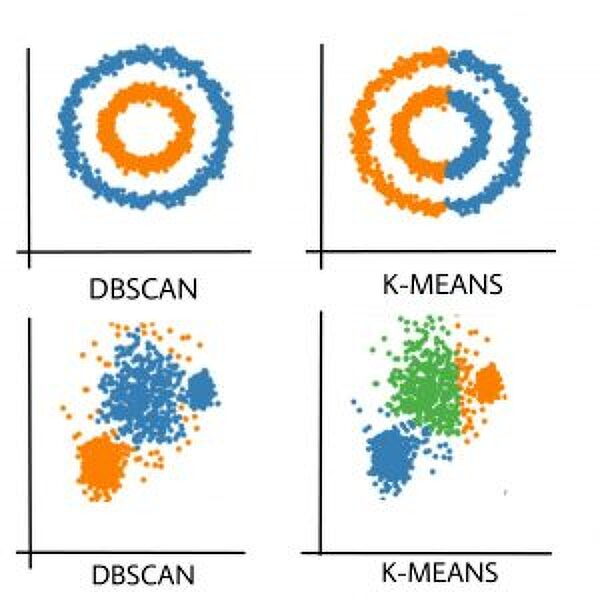



#### make_blobs
- Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None, #keywords only
- cluster간의 표준편차를 조정하여 cluster가 있는 랜덤한 데이터 생성해줌
- clustering 모델의 일반화된 성능 확인 
    - random 데이터에서도 성능이 보장되는지 
    - 이미지에서는 noise 생성해서 검정

In [100]:
#300개 samples,2개 features,cluster  4개
data2= make_blobs(n_samples=300,n_features=2,centers=4,cluster_std=1)
data2

(array([[ 6.93899653e+00,  5.52721898e+00],
        [ 8.05003768e+00,  4.73827033e+00],
        [ 1.99093145e+00, -5.05504774e+00],
        [ 7.25222455e+00, -2.39191783e+00],
        [ 6.98922752e+00, -2.58966614e-01],
        [ 6.98710875e+00,  5.10077270e+00],
        [ 1.08577092e+01, -1.91622798e+00],
        [ 2.17060366e+00, -4.64899384e+00],
        [ 7.23436163e+00,  4.92438492e+00],
        [ 4.35702374e+00, -5.06567271e+00],
        [ 1.12619592e+00, -5.36465311e+00],
        [ 2.67331501e+00,  3.90215329e+00],
        [ 1.72559321e+00,  2.43984060e+00],
        [ 1.66856321e+00,  3.40907409e+00],
        [ 8.65206306e+00,  6.48626480e+00],
        [ 8.87203174e+00, -2.89748164e-01],
        [ 9.79424044e+00,  5.35707672e+00],
        [ 8.22478363e+00, -1.54180322e-01],
        [ 1.05134004e+01, -2.27723031e-01],
        [ 3.39958183e+00,  1.66730015e+00],
        [ 3.57548753e+00, -6.02951806e+00],
        [ 9.71711643e+00, -9.85097566e-01],
        [ 4.44413997e+00, -4.823

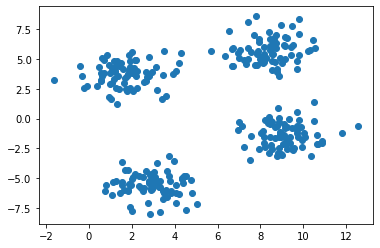

In [112]:
plt.scatter(data2[0][:,0],data2[0][:,1]) #4개의 clusters

In [113]:
cv2.ml.KNearest_create #ml에 있음

<function KNearest_create>

In [114]:
cv2.kmeans #바자도학습은 ml에 안속해 있음

<function kmeans>

In [115]:
dir(cv2.kmeans)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']

### Kmeans
1. 초기화 : 처음에 랜덤하게 k 개의 데이터를 찍음
2. 각 랜던하게 찍은 point 에 가까운 cluster 지정
3. 각 가까운 cluster의 평균을 구하여 이동시킴
4. 또 가까운 clustering 구해서 이동시키는 작업을 반복( reassign, recompute)
5. 해당 평균에 다다르면 이동이 멈추면 끝남

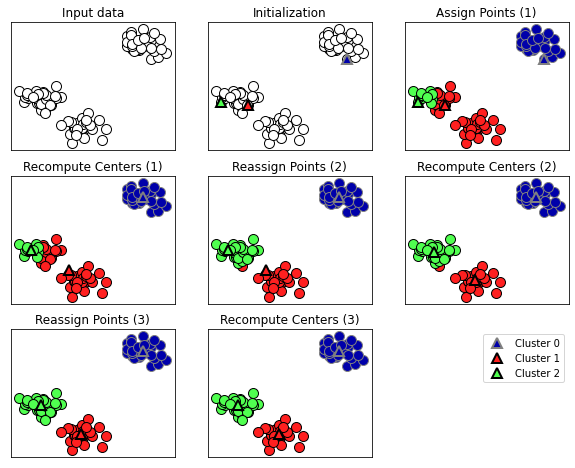

In [105]:
mglearn.plot_kmeans.plot_kmeans_algorithm()

#### KMEANS_RANDOM_CENTERS
- 램덤하게 초기화 할 때마다 매번 다르게 나와 cluster가 달라지는 문제

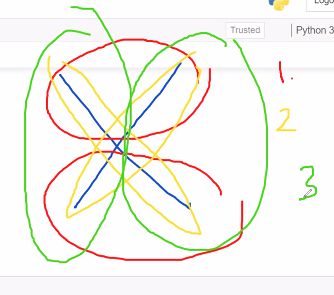

In [117]:
data2[1]

array([1, 1, 2, 0, 0, 1, 0, 2, 1, 2, 2, 3, 3, 3, 1, 0, 1, 0, 0, 3, 2, 0,
       2, 3, 1, 3, 1, 0, 0, 3, 3, 0, 2, 3, 2, 0, 0, 2, 3, 2, 2, 1, 3, 2,
       2, 3, 0, 0, 1, 1, 2, 2, 3, 0, 0, 2, 1, 3, 3, 3, 0, 0, 1, 2, 2, 0,
       0, 1, 3, 2, 3, 0, 2, 0, 3, 1, 1, 2, 2, 2, 1, 0, 2, 3, 1, 0, 3, 0,
       2, 0, 1, 2, 1, 3, 2, 2, 3, 3, 0, 2, 3, 2, 3, 1, 0, 0, 1, 0, 2, 1,
       1, 2, 0, 0, 3, 3, 0, 3, 1, 1, 2, 1, 3, 3, 3, 3, 0, 0, 1, 2, 3, 2,
       2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 1,
       1, 3, 0, 2, 2, 3, 1, 2, 3, 0, 1, 0, 2, 3, 2, 1, 2, 0, 1, 1, 0, 1,
       1, 3, 2, 2, 2, 2, 2, 1, 0, 0, 3, 3, 1, 0, 2, 2, 1, 3, 2, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 3, 3, 1, 2, 3, 0, 3, 1, 2,
       0, 0, 2, 1, 3, 1, 3, 2, 3, 0, 0, 1, 0, 3, 3, 0, 1, 2, 1, 3, 0, 0,
       0, 0, 1, 1, 3, 1, 3, 0, 0, 2, 1, 3, 2, 3, 0, 3, 3, 2, 2, 0, 3, 0,
       3, 3, 0, 1, 3, 0, 1, 2, 2, 0, 3, 2, 2, 1, 3, 3, 3, 3, 0, 1, 0, 1,
       3, 3, 3, 1, 0, 3, 1, 3, 3, 0, 1, 1, 3, 1])

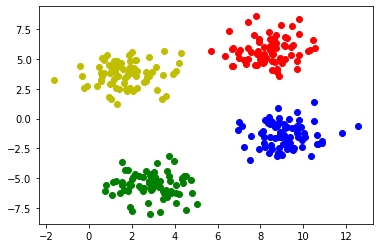

In [118]:
blue   = data2[0][data2[1]==0]   #이전에 배운거 사용
red    = data2[0][data2[1]==1] 
green  = data2[0][data2[1]==2] 
yellow = data2[0][data2[1]==3] 

plt.scatter(blue[:,0],blue[:,1], color='b')
plt.scatter(red[:,0],red[:,1], color='r')
plt.scatter(green[:,0],green[:,1], color='g')
plt.scatter(yellow[:,0],yellow[:,1], color='y')

In [106]:
cv2.KMEANS_RANDOM_CENTERS #상수

0

- `kmeans(data, K, bestLabels, criteria, attempts, flags[, centers]) -> retval, bestLabels, center`


- criteria
    -  조건이 만족되면 알고리즘의 반복은 중지하는 반복 종료하는 기준 **(type, max_iter, epsilon)**
        - TERM_CRITERIA_MAX_ITER/ TERM_CRITERIA_EPS
            - 최대 반복횟수/ 정확도 기준에 따라 종료하는 기준 지정
        - 최대 반복 횟수(max_iter, 정수)
        - 정확도(epsilon)
    - tuple 로 묶어 줘야함
- attemps
    -  랜덤 초기화하는 횟수

#### return
- retval: 중점에서 각각의 점들의 거리의 제곱한 값이 최소인 값
    - $\sum_i  | {samples} _i -  \texttt{centers}|^2$
- bestLabels: 각 값에 할당된 cluster
    - 비지도 학습을 활용해서 지도학습을 위한 자동 labelling에 응용 가능
- center: 각 cluster의 중점 

In [109]:
#4개로 구분
ret,label,center= cv2.kmeans(data2[0].astype('float32'),  4,  None, 
           ( cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1),100,
          cv2.KMEANS_RANDOM_CENTERS) 

In [110]:
ret,label, center

(644.6616314309649,
 array([[1],
        [1],
        [0],
        [2],
        [2],
        [1],
        [2],
        [0],
        [1],
        [0],
        [0],
        [3],
        [3],
        [3],
        [1],
        [2],
        [1],
        [2],
        [2],
        [3],
        [0],
        [2],
        [0],
        [3],
        [1],
        [3],
        [1],
        [2],
        [2],
        [3],
        [3],
        [2],
        [0],
        [3],
        [0],
        [2],
        [2],
        [0],
        [3],
        [0],
        [0],
        [1],
        [3],
        [0],
        [0],
        [3],
        [2],
        [2],
        [1],
        [1],
        [0],
        [0],
        [3],
        [2],
        [2],
        [0],
        [1],
        [3],
        [3],
        [3],
        [2],
        [2],
        [1],
        [0],
        [0],
        [2],
        [2],
        [1],
        [3],
        [0],
        [3],
        [2],
        [0],
        [2],
        [3],
     

kmeans 통해서 나온 값으로 시각화 

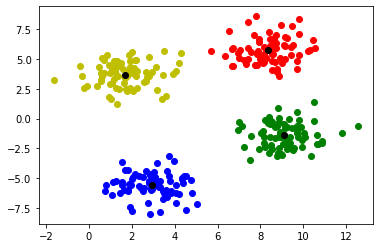

In [150]:
blue   = data2[0][labelflatten()==0]  
red    = data2[0][labelflatten()==1] 
green  = data2[0][labelflatten()==2] 
yellow = data2[0][labelflatten()==3] 

plt.scatter(blue[:,0],blue[:,1], color='b')
plt.scatter(red[:,0],red[:,1], color='r')
plt.scatter(green[:,0],green[:,1], color='g')
plt.scatter(yellow[:,0],yellow[:,1], color='y')
plt.scatter(center[:,0],center[:,1],color='black')

In [151]:
#2개로 구분하는 경우
ret,label,center= cv2.kmeans(data2[0].astype('float32'),  2,  None, 
           ( cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1),100,
          cv2.KMEANS_RANDOM_CENTERS) 

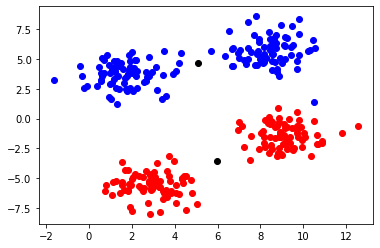

In [154]:
blue   = data2[0][label.flatten()==0]  
red    = data2[0][label.flatten()==1] 


plt.scatter(blue[:,0],blue[:,1], color='b')
plt.scatter(red[:,0],red[:,1], color='r')

plt.scatter(center[:,0],center[:,1],color='black')

cv2.TermCriteria_COUNT
- 2의 배수를 이용해서 옵션
